In [5]:
# Mackaelan Songco
# Homework 8 - Curve Fitting & Linear Regression 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

In [ ]:
# 1 Curve Fitting Guided Problem

In [7]:
# 1a
dataFrame = pd.read_csv("GlobalLandTemperaturesByState.csv")
dataFrame = dataFrame.loc[:, ['dt', 'AverageTemperature', 'State']]
dataFrame = dataFrame.loc[(dataFrame['dt'] >= '2000-01-01')]
dataFrame.loc[(dataFrame['State'] == 'Nebraska') | (dataFrame['State'] == 'South Dakota') | (dataFrame['State'] == 'Wyoming')]

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [16]:
# 1b
dataFrame = dataFrame.groupby('dt')['AverageTemperature'].mean().reset_index()
dataFrame

,dt,AverageTemperature
0,2000-01-01,-1.488701
1,2000-02-01,1.636025
2,2000-03-01,5.949112
3,2000-04-01,11.893104
4,2000-05-01,15.598062
...,...,...
160,2013-05-01,16.636224
161,2013-06-01,20.038432
162,2013-07-01,21.292237
163,2013-08-01,20.504776


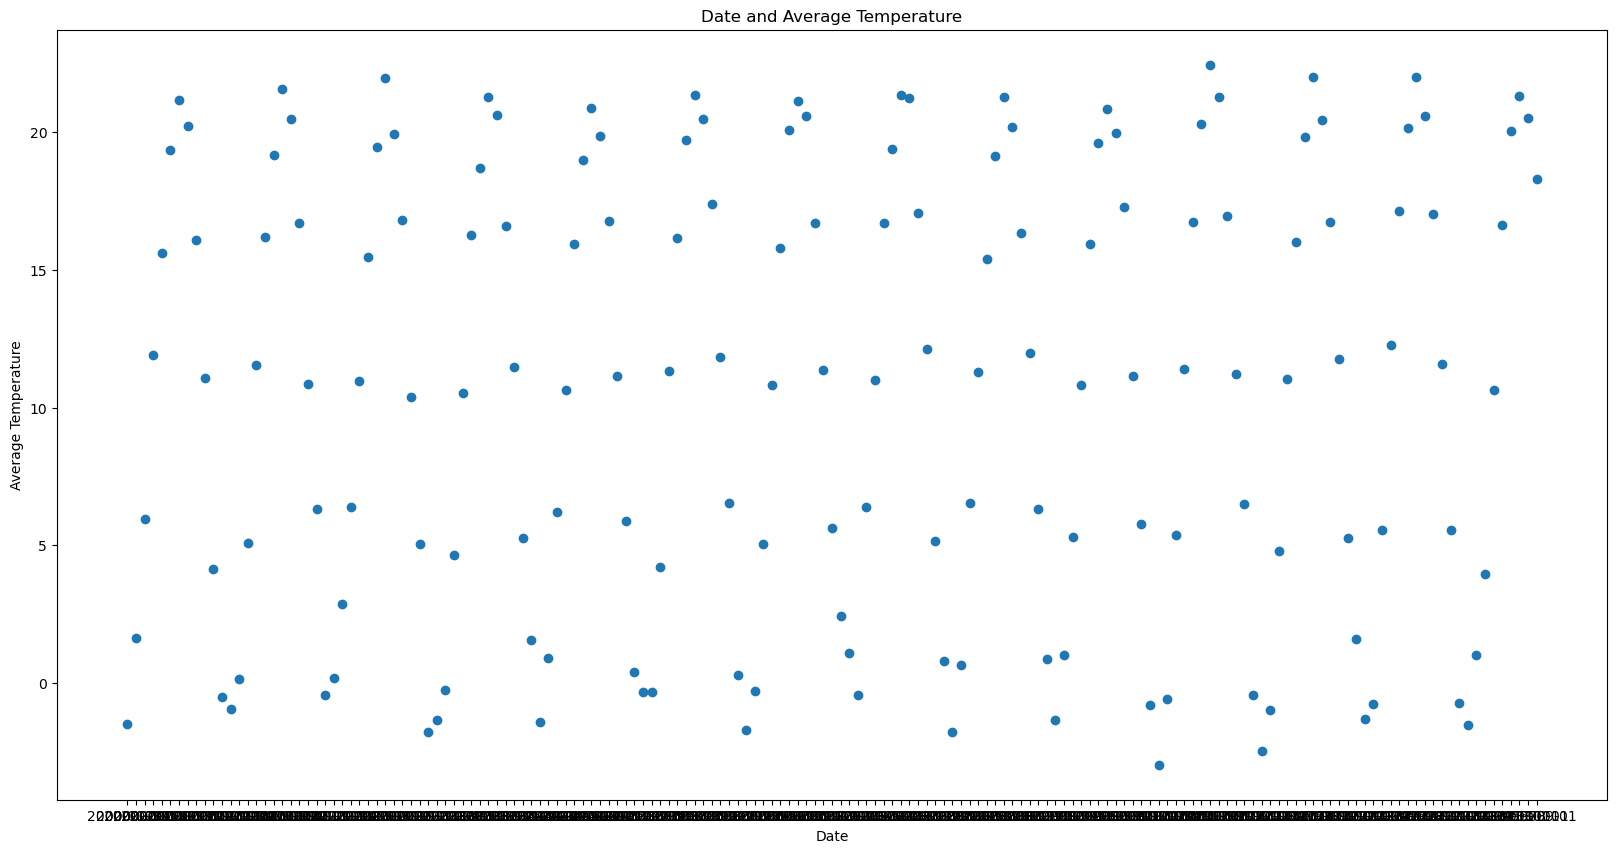

In [17]:
# 1c
plt.figure(figsize = (20, 10))
plt.scatter(dataFrame['dt'], dataFrame['AverageTemperature'])
plt.title("Date and Average Temperature")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

In [20]:
# 1d
dataFrame['dt'] = pd.to_datetime(dataFrame['dt'])
dataFrame['dtNum'] = dataFrame['dt'].apply(lambda x: int(x.strftime('%Y%m%d')))
dataFrame

,dt,AverageTemperature,dtNum
0,2000-01-01,-1.488701,20000101
1,2000-02-01,1.636025,20000201
2,2000-03-01,5.949112,20000301
3,2000-04-01,11.893104,20000401
4,2000-05-01,15.598062,20000501
...,...,...,...
160,2013-05-01,16.636224,20130501
161,2013-06-01,20.038432,20130601
162,2013-07-01,21.292237,20130701
163,2013-08-01,20.504776,20130801


In [30]:
# 1e 
def equation(x, a, b, c, d):
    return a * np.cos(b * x + c) + d

guess = [15, 0.05, 1, 10]

In [37]:
# 1f
x = dataFrame['dtNum']
params, paramsCov = curve_fit(equation, dataFrame['dtNum'], dataFrame['AverageTemperature'], guess) 
a, b, c, d = params
yFit = equation(x, a, b, c, d)

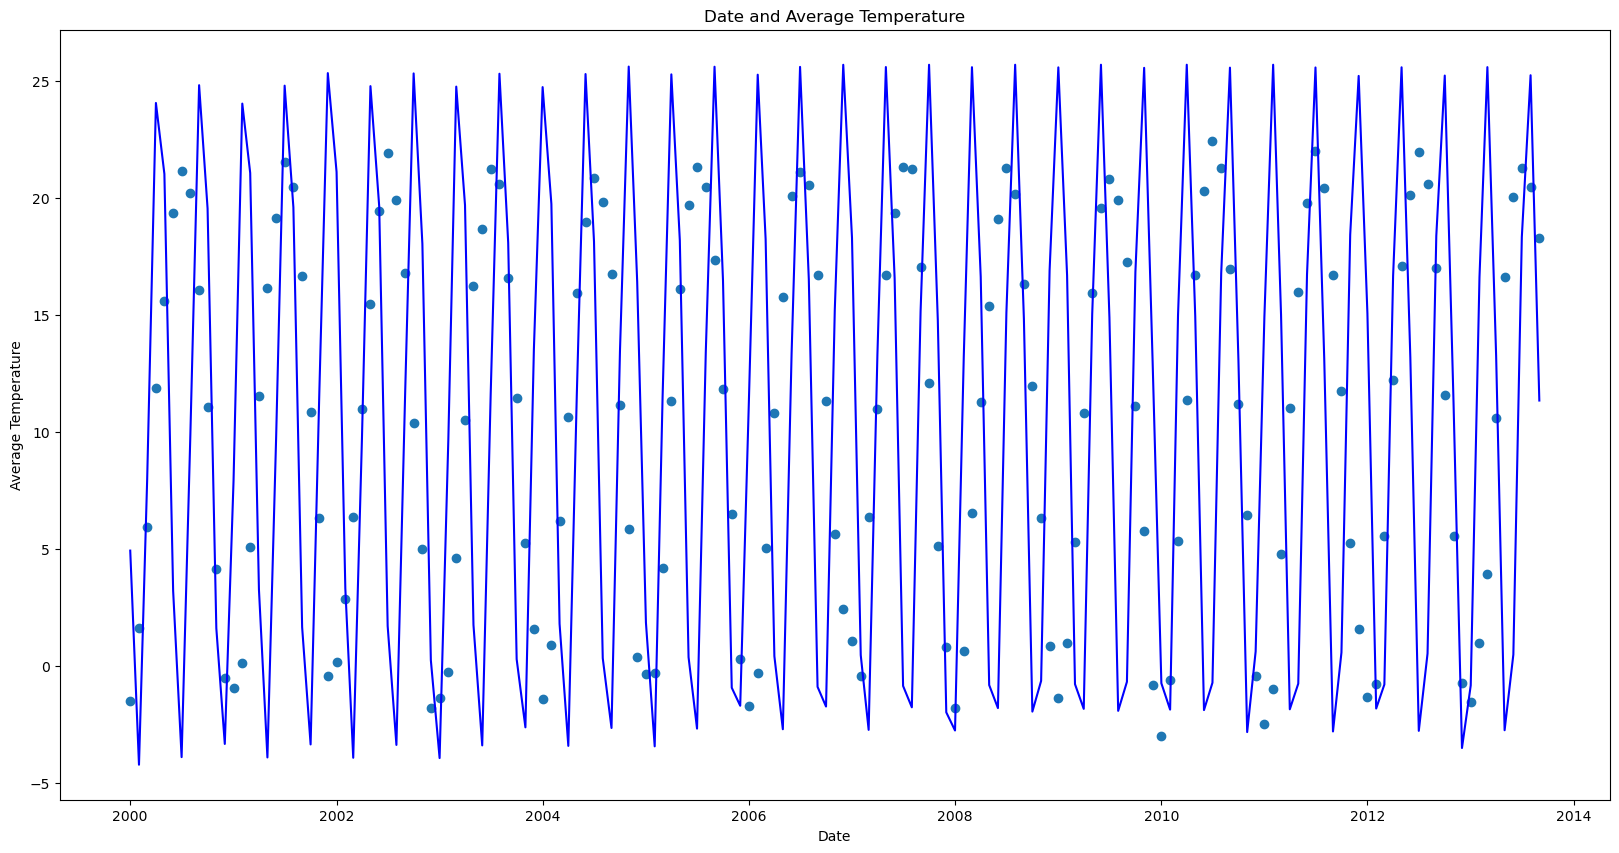

In [34]:
# 1g
plt.figure(figsize = (20, 10))
plt.scatter(dataFrame['dt'], dataFrame['AverageTemperature'])
plt.plot(dataFrame['dt'], yFit, label='Fitted Curve', color='blue')
plt.title("Date and Average Temperature")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()

In [41]:
# 1h
errors = np.sqrt(np.diag(paramsCov))
for i, param in enumerate(params):
    print(f'Parameter {i+1}: {param:.4f} ± {errors[i]:.4f}')

Parameter 1: 0.3176 ± 3.4935
Parameter 2: 0.0500 ± 0.0001
Parameter 3: -189.0066 ± 1421.0730
Parameter 4: 10.7100 ± 0.6357


In [42]:
# 1i
print(f'Fitted Equation: y = {a:.4f} * cos({b:.4f} * x + {c:.4f}) + {d:.4f}')

Fitted Equation: y = 0.3176 * cos(0.0500 * x + -189.0066) + 10.7100


In [ ]:
# 2 Random Plotting Practice

In [66]:
list1 = random.sample(range(0, 200), 50)
list2 = random.sample(range(0, 200), 50)
list3 = random.sample(range(0, 200), 50)

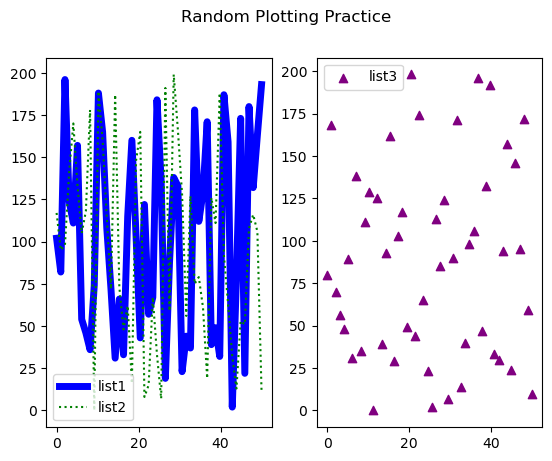

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Random Plotting Practice')
ax1.plot(np.linspace(0, 50), list1, color = 'blue', linewidth = 5, label="list1")
ax1.plot(np.linspace(0, 50), list2, color = 'green', linestyle = 'dotted', label="list2")
ax2.scatter(np.linspace(0, 50), list3, color = 'purple', marker = '^', label="list3")
ax1.legend()
ax2.legend()

In [ ]:
# 3 Monte Carlo

N = 10: Pi estimate = 2.4
N = 1000: Pi estimate = 3.176
N = 100000: Pi estimate = 3.13868
N = 1000000: Pi estimate = 3.141352


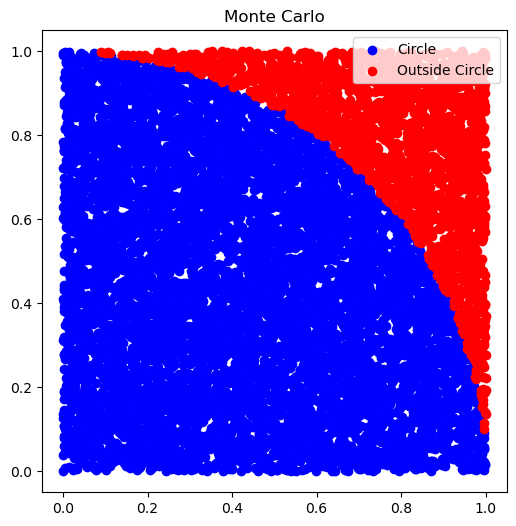

In [96]:
def estimate(N):
    circle = 0
    for i in range(N):
        x, y = random.random(), random.random()
        if x**2 + y**2 <= 1:
            circle += 1
    estimate = 4 * (circle / N)
    return estimate

N = [10, 10**3, 10**5, 10**6]
for j in N:
    print(f"N = {j}:  = {estimate(j)}")

NPlot = 10**4
circleX, circleY = [], []
outsideCircleX, outsideCircleY = [], []
for _ in range(NPlot):
    x, y = random.random(), random.random()
    if x**2 + y**2 <= 1:
        circleX.append(x)
        circleY.append(y)
    else:
        outsideCircleX.append(x)
        outsideCircleY.append(y)

plt.figure(figsize = (6, 6))
plt.scatter(circleX, circleY, color = 'blue', label = 'Circle')
plt.scatter(outsideCircleX, outsideCircleY, color = 'red', label = 'Outside Circle')
plt.title('Monte Carlo')
plt.legend()
plt.show()